NPCI shape: (0, 3)
PhonePe shape: (5034, 6)


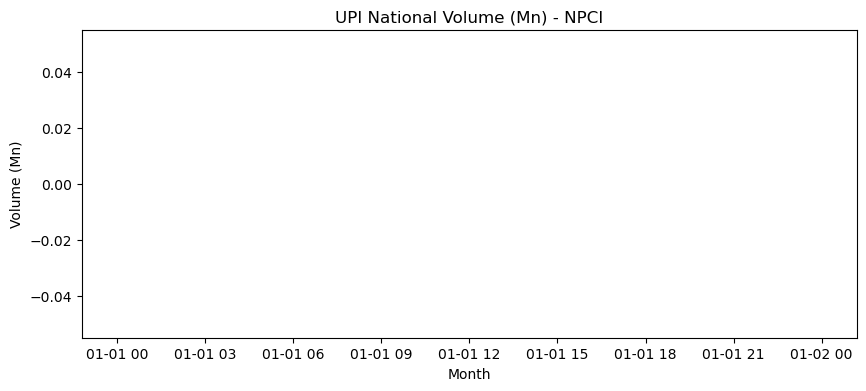

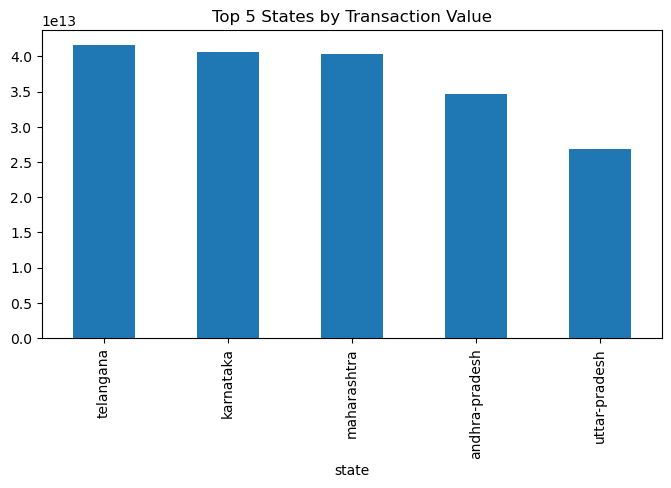


Missing values (NPCI):
Month     0
Volume    0
Value     0
dtype: int64

Missing values (PhonePe):
state         0
year          0
quarter       0
txn_type      0
txn_count     0
txn_amount    0
dtype: int64


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load bronze datasets
npci = pd.read_parquet("../data/bronze/npci_stats.parquet")
phonepe = pd.read_parquet("../data/bronze/phonepe_transactions.parquet")

print("NPCI shape:", npci.shape)
print("PhonePe shape:", phonepe.shape)

# ---- National UPI trend (NPCI) ----
plt.figure(figsize=(10,4))
plt.plot(npci["Month"], npci["Volume"], marker="o")
plt.title("UPI National Volume (Mn) - NPCI")
plt.xlabel("Month")
plt.ylabel("Volume (Mn)")
plt.show()

# ---- Top 5 states by total transaction value ----
top_states = (
    phonepe.groupby("state")["txn_amount"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

top_states.plot(kind="bar", figsize=(8,4), title="Top 5 States by Transaction Value")
plt.show()

# ---- Missing data check ----
print("\nMissing values (NPCI):")
print(npci.isna().sum())

print("\nMissing values (PhonePe):")
print(phonepe.isna().sum())
